Classification Exercise: Predict 5-Year Career Longevity for NBA Rookies

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [0]:
#colnames = ['Name','Games_played','Minutes_played','PointsPerGame','FeildGoalsMade','FeildGoalAttempts','FeildGoalPercent','3PointMade','3PointsAttempts','Freethrowmade','freethrowattempts','freethrowpercents','offensiverebounds','defensiverebounds','rebounds','assists','steals','Blocks','turnovers','Target_5yrs']
nba= pd.read_csv('/content/drive/My Drive/AI_and_Machine_Learning/Machine Learning Practice/Regression/nba log/nba_logreg.csv')

In [14]:
nba

Name  GP   MIN  PTS  FGM  ...  AST  STL  BLK  TOV  TARGET_5Yrs
0      Brandon Ingram  36  27.4  7.4  2.6  ...  1.9  0.4  0.4  1.3          0.0
1     Andrew Harrison  35  26.9  7.2  2.0  ...  3.7  1.1  0.5  1.6          0.0
2      JaKarr Sampson  74  15.3  5.2  2.0  ...  1.0  0.5  0.3  1.0          0.0
3         Malik Sealy  58  11.6  5.7  2.3  ...  0.8  0.6  0.1  1.0          1.0
4         Matt Geiger  48  11.5  4.5  1.6  ...  0.3  0.3  0.4  0.8          1.0
...               ...  ..   ...  ...  ...  ...  ...  ...  ...  ...          ...
1335      Chris Smith  80  15.8  4.3  1.6  ...  2.5  0.6  0.2  0.8          0.0
1336      Brent Price  68  12.6  3.9  1.5  ...  2.3  0.8  0.0  1.3          1.0
1337     Marlon Maxey  43  12.1  5.4  2.2  ...  0.3  0.3  0.4  0.9          0.0
1338  Litterial Green  52  12.0  4.5  1.7  ...  2.2  0.4  0.1  0.8          1.0
1339        Jon Barry  47  11.7  4.4  1.6  ...  1.4  0.7  0.1  0.9          1.0

[1340 rows x 21 columns]

Here we can see the detailas of the data

In [15]:
nba.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

we can see 3point is having nul values .

In [0]:
nba =nba.fillna(nba.median())

we replaced all the null values with the median values

now we can visualize the data to see the relationship between the columns

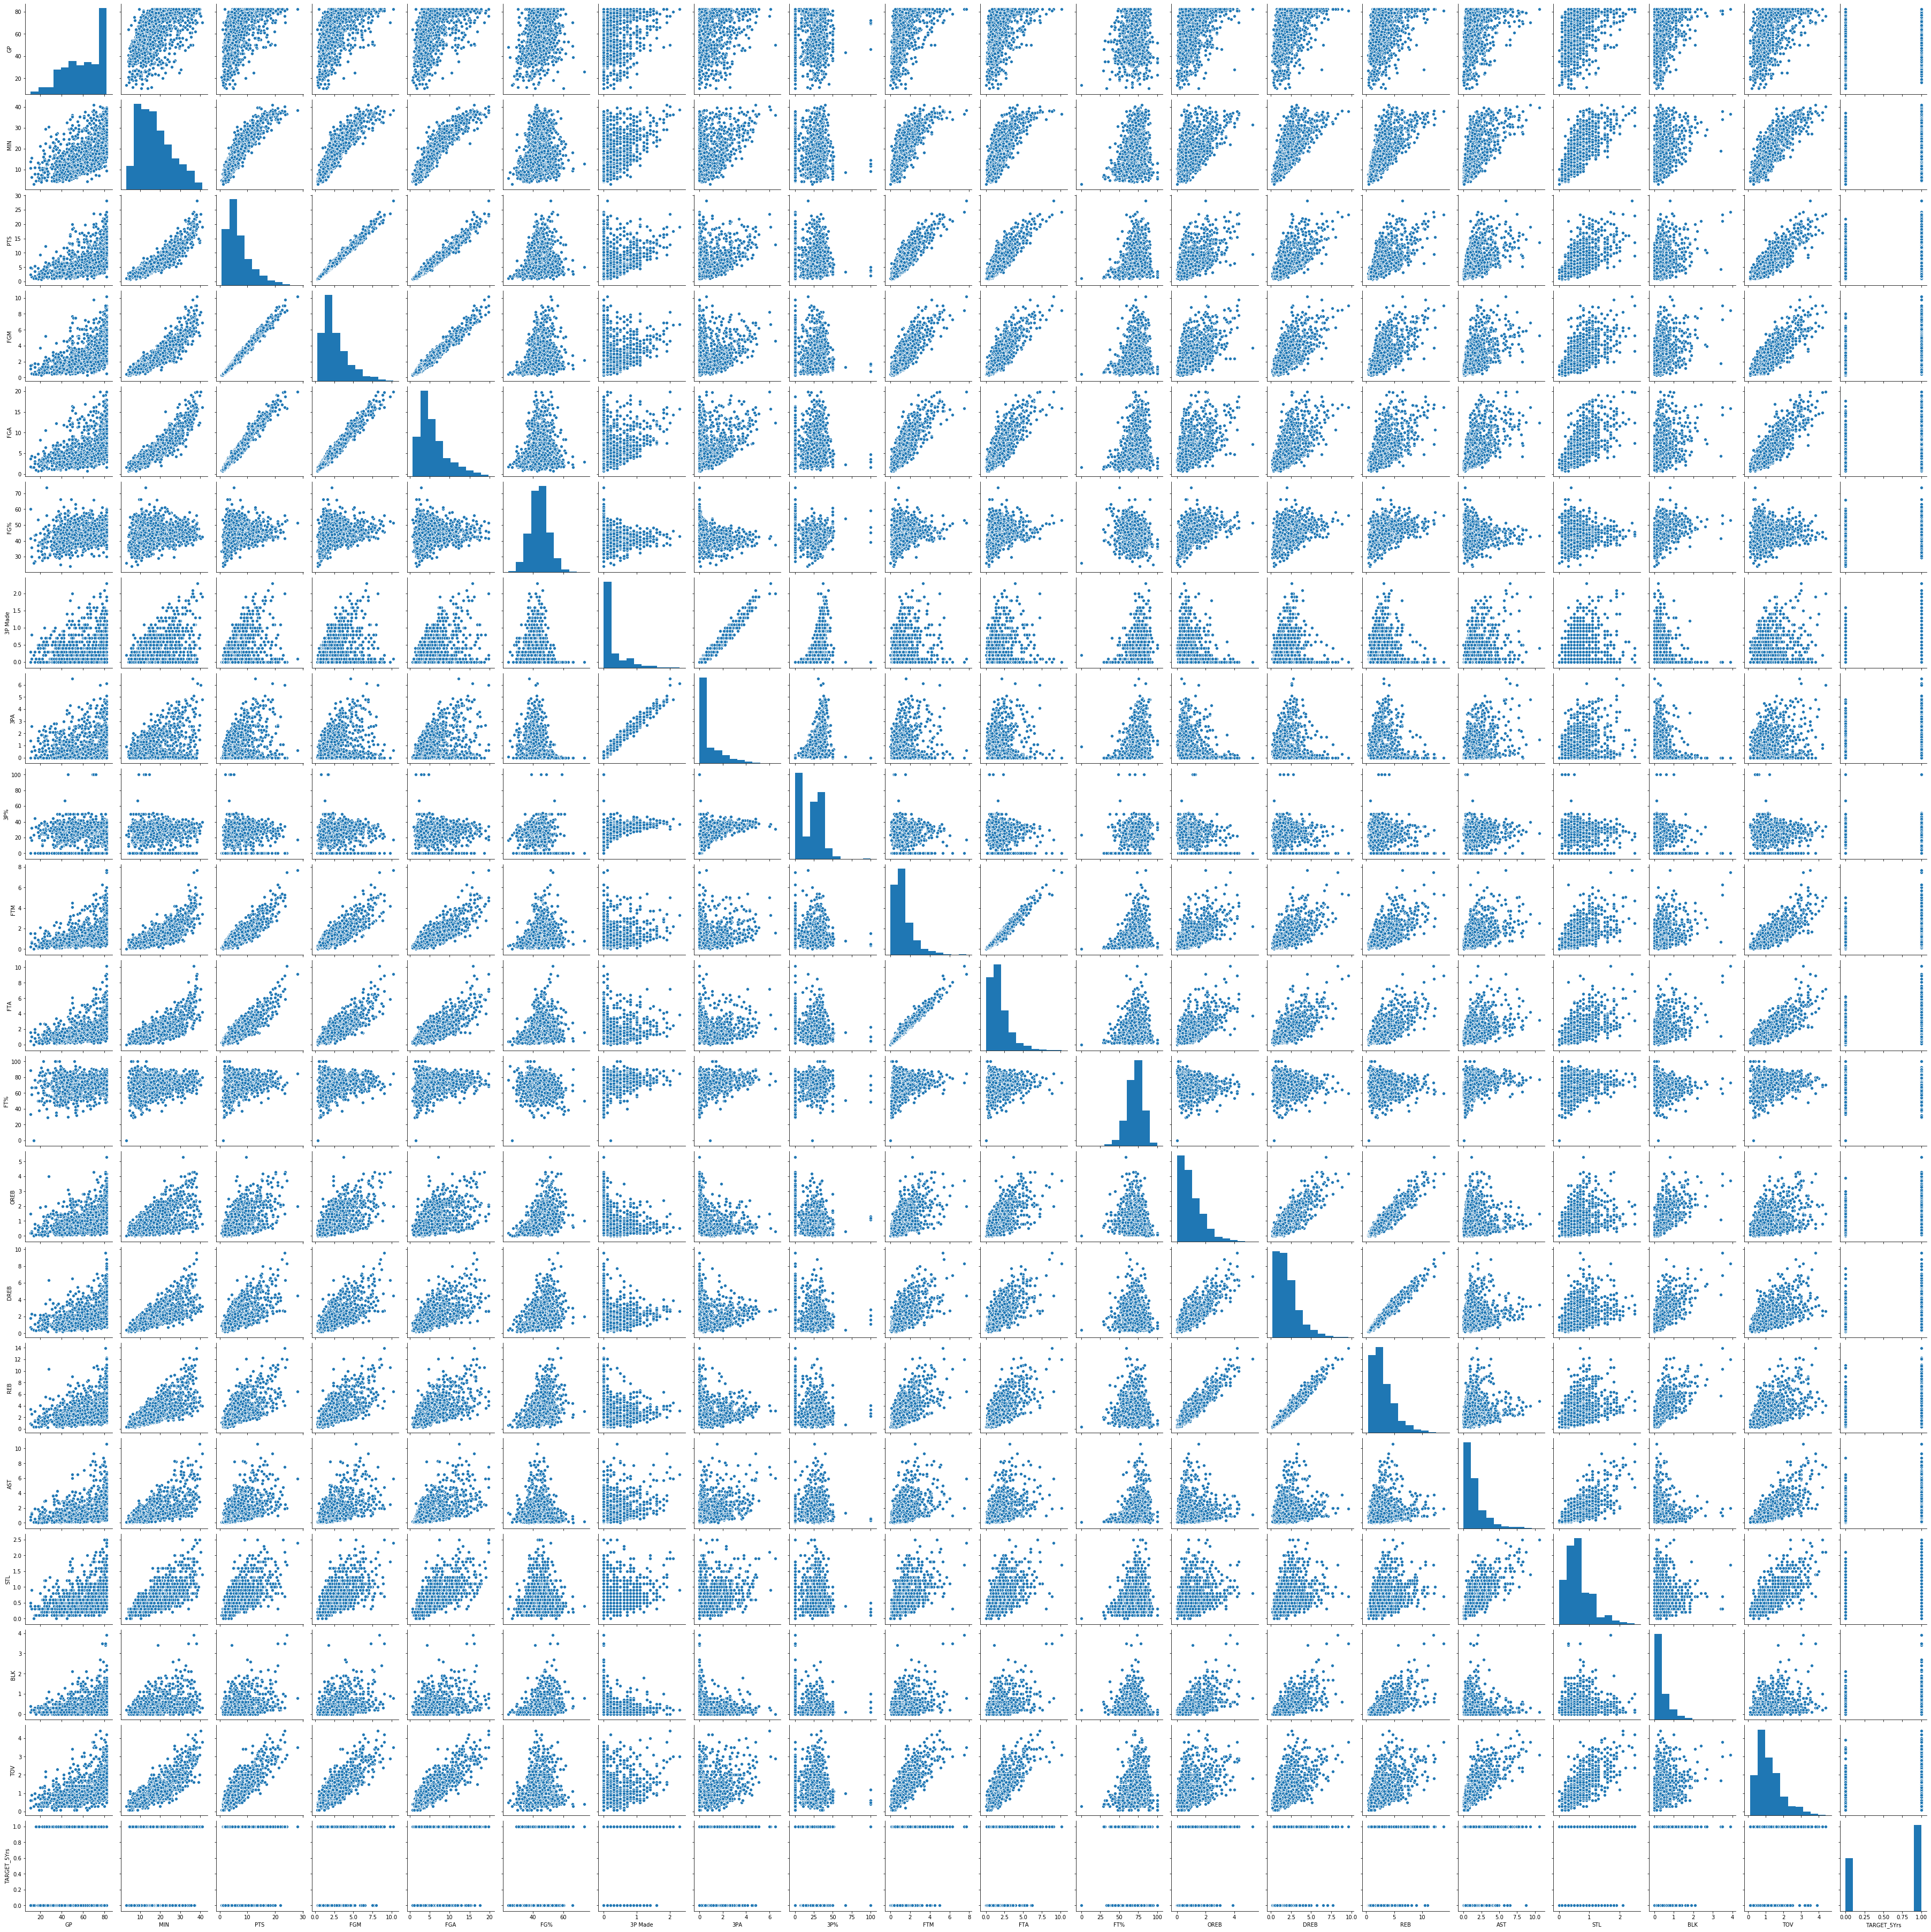

In [18]:
sns.pairplot(nba)

from the above we can see that most of the columns are skwed. We can drop the unwanted columns from our data set which helps in more accurate prediction

In [0]:
nba=nba.drop('Name',axis=1)

In [23]:
nba.head(50)

GP   MIN   PTS  FGM   FGA   FG%  ...   REB  AST  STL  BLK  TOV  TARGET_5Yrs
0   36  27.4   7.4  2.6   7.6  34.7  ...   4.1  1.9  0.4  0.4  1.3          0.0
1   35  26.9   7.2  2.0   6.7  29.6  ...   2.4  3.7  1.1  0.5  1.6          0.0
2   74  15.3   5.2  2.0   4.7  42.2  ...   2.2  1.0  0.5  0.3  1.0          0.0
3   58  11.6   5.7  2.3   5.5  42.6  ...   1.9  0.8  0.6  0.1  1.0          1.0
4   48  11.5   4.5  1.6   3.0  52.4  ...   2.5  0.3  0.3  0.4  0.8          1.0
5   75  11.4   3.7  1.5   3.5  42.3  ...   0.8  1.8  0.4  0.0  0.7          0.0
6   62  10.9   6.6  2.5   5.8  43.5  ...   2.0  0.6  0.2  0.1  0.7          1.0
7   48  10.3   5.7  2.3   5.4  41.5  ...   1.7  0.2  0.2  0.1  0.7          1.0
8   65   9.9   2.4  1.0   2.4  39.2  ...   0.8  2.3  0.3  0.0  1.1          0.0
9   42   8.5   3.7  1.4   3.5  38.3  ...   1.1  0.3  0.2  0.0  0.7          0.0
10  35   6.9   2.3  0.9   2.4  36.5  ...   0.9  0.7  0.1  0.1  0.3          0.0
11  40   6.7   3.6  1.2   3.0  39.8  ...   1.2  0.4  0.3  0.1  0.6          1.0
12  27   6.6   1.3  0.6   1.3  47.2  ...   2.0  0.2  0.2  0.6  0.3          1.0
13  45  15.3   5.6  1.9   6.0  32.3  ...   2.0  0.5  0.5  0.3  0.5          0.0
14  44   6.4   2.4  1.0   1.9  53.7  ...   1.4  0.2  0.2  0.4  0.6          1.0
15  40   6.1   2.6  0.9   1.8  51.4  ...   0.4  1.4  0.3  0.0  0.8          1.0
16  49   5.3   2.1  0.7   1.9  37.6  ...   1.2  0.2  0.3  0.2  0.5          0.0
17  41   4.2   1.7  0.6   1.6  34.8  ...   0.3  1.0  0.3  0.0  0.4          0.0
18  82  37.2  19.2  7.5  15.3  49.0  ...  11.0  3.6  1.0  0.6  1.9          0.0
19  82  37.2  19.2  7.5  15.3  49.0  ...  11.0  3.6  1.0  0.6  1.9          1.0
20  80  31.4  14.3  5.9  11.1  52.5  ...   8.0  2.4  1.1  0.8  2.2          1.0
21  82  30.5  13.3  5.4  11.0  48.9  ...   5.1  2.5  1.5  0.3  2.2          1.0
22  76  30.3  10.6  4.4  11.7  37.5  ...   2.9  2.2  2.0  0.2  2.0          1.0
23  61  29.6  12.0  4.9  10.7  45.4  ...   3.1  4.6  1.0  0.3  2.5          0.0
24  32  15.2   6.3  2.8   5.2  53.3  ...   5.2  0.4  0.5  0.5  1.0          0.0
25  76  29.3  10.4  4.0   7.8  51.4  ...   5.9  1.6  0.7  0.6  1.5          1.0
26  52  24.6   9.3  3.1   6.8  45.1  ...   1.9  3.7  0.6  0.0  1.8          0.0
27  76  22.5   8.8  3.8   9.2  41.5  ...   5.1  1.7  0.8  0.5  1.3          1.0
28  78  22.0  10.1  3.9   8.7  44.7  ...   3.0  2.2  1.2  0.3  1.2          0.0
29  51  20.7   8.4  3.2   6.4  49.7  ...   5.4  0.8  0.5  0.5  1.5          1.0
30  64  20.3   6.2  2.4   4.4  55.2  ...   6.4  0.5  0.4  1.2  0.8          1.0
31  55  20.3  10.4  4.3   8.1  52.9  ...   6.1  0.7  0.4  1.5  1.4          1.0
32  82  19.6   7.4  3.1   7.3  41.9  ...   2.0  3.9  1.0  0.3  1.7          1.0
33  48  18.9   9.1  3.6   6.8  52.8  ...   5.7  0.7  0.8  1.1  1.8          1.0
34  34  13.4   4.3  1.5   5.0  30.2  ...   1.4  3.1  0.6  0.2  1.0          0.0
35  42  18.6   8.5  3.1   7.7  40.0  ...   2.0  1.1  0.8  0.1  1.1          1.0
36  82  18.4   5.5  2.0   5.3  37.0  ...   1.7  3.8  0.7  0.1  1.2          1.0
37  64  17.0   7.0  2.9   7.5  39.0  ...   2.0  3.2  1.1  0.1  1.5          1.0
38  80  16.9   7.4  3.0   5.7  52.9  ...   4.2  0.4  0.6  0.8  1.1          1.0
39  77  15.1   5.6  2.3   4.9  46.7  ...   3.8  0.4  0.3  0.6  0.9          1.0
40  55  14.9   4.1  1.7   4.1  41.7  ...   1.5  1.5  0.7  0.2  0.8          0.0
41  48  14.8   5.1  2.1   5.1  40.7  ...   1.7  2.1  0.9  0.0  1.3          0.0
42  51  14.5   5.0  1.5   3.8  39.9  ...   1.5  2.8  0.9  0.0  1.4          0.0
43  51  13.2   3.9  1.6   4.1  40.2  ...   2.1  0.8  0.3  0.2  0.7          0.0
44  72  12.4   4.6  1.6   3.8  42.3  ...   1.3  1.9  0.6  0.1  1.3          1.0
45  69  11.8   3.6  1.6   3.6  45.2  ...   2.7  0.6  0.5  0.3  0.6          1.0
46  54  11.3   5.7  2.2   3.8  56.8  ...   3.4  0.3  0.6  0.7  0.8          1.0
47  24  10.6   4.1  1.3   4.1  30.3  ...   0.7  1.5  0.7  0.1  1.3          0.0
48  50   9.6   4.1  1.5   3.7  41.5  ...   1.1  1.8  0.6  0.1  1.0          1.0
49  

we have dropped the name column which we dont need for prediction

In [0]:
array=nba.values
from sklearn import preprocessing

In [0]:
#drop_elements = ['GP','MIN','PTS','FGM','FGA','FG%','3P Made','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV' ]
drop_elements = ['TARGET_5Yrs' ]
y = nba["TARGET_5Yrs"]
X = nba.drop(drop_elements, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [41]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
y_predict = logreg.predict(X_test_scaled)
model_score = logreg.score(X_test_scaled, y_test)
print('confusion matrix is',metrics.confusion_matrix(y_test, y_predict))
print('The accuracy of the Logistic Regression is', score_logreg)
#precision = precision_score(X_test,y_test)

confusion matrix is [[129  21]
 [185  67]]
The accuracy of the Logistic Regression is 0.7238805970149254


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7238805970149254
[[ 78  72]
 [ 39 213]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
